# What Makes a Successful Horror Film?
Group-1: Xiaofan Fan, Tianyu Li, Wenxin Zhang

In [206]:
import pandas as pd

annie's test overwrite revised by wenxin

wenxin

## File Reading and Data Cleaning
FILE DESCRIPTION HERE!!!!!!!!!!!!

In [207]:
# READ FILES

## 1. Film Release Year & Rating
People often think that most top-rated horror movies are the classic old movies. So, for the first part, we want to figure out whether old horror movies are better than modern horror movies.

In [208]:
mainpage = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/mainpage.csv")
mainpage.shape

(730, 5)

In [209]:
type(mainpage['Rate'][1])

numpy.float64

In [210]:
mainpage.query("Name == 'Raw'")

,Name,Year,Rate,Genre,Country
36,Raw,2016,7.0,"Drama,Horror",France


In [211]:
malespider = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/malespider.csv")
malespider.shape

(110, 24)

In [212]:
ranking = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/ranking.csv")
ranking.shape

(729, 3)

In [213]:
ranking.sort_values(['Name']).value_counts()

Rank  Name                                  Year
1     Psycho                                1960    1
480   King Kong                             1976    1
482   Escape Room: Tournament of Champions  2021    1
483   Vivarium                              2019    1
484   Underwater                            2020    1
                                                   ..
246   You're Next                           2011    1
247   Halloween                             2018    1
248   The Loved Ones                        2009    1
249   Pontypool                             2008    1
729   Manos: The Hands of Fate              1966    1
Length: 729, dtype: int64

In [214]:
ranking.query("Rank == 563")

,Rank,Name,Year
562,563,Cube²: Hypercube,2002


In [215]:
allrate = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/allrate.csv")
allrate.head()

,Name,Year,Rating,User_Type,vote10,vote9,vote8,vote7,vote6,vote5,vote4,vote3,vote2,vote1
0,The Lighthouse,2019,7.5,IMDb Users,21413,29629,48256,37827,18885,9223,4841,3132,2268,3743
1,A Quiet Place,2018,7.5,IMDb Users,54103,75677,152430,118066,47978,18678,8604,5048,3367,5649
2,The Conjuring,2013,7.5,IMDb Users,61822,70986,145724,120266,48014,17467,7025,3644,2187,3614
3,American Psycho,2000,7.6,IMDb Users,62803,84728,168004,131072,51486,19245,8347,4427,2934,4419
4,Psycho,1960,8.5,IMDb Users,154176,178106,173392,81863,26755,10529,4706,2575,1848,4906


In [216]:
main_rank = pd.merge(ranking, mainpage, on = ["Name", "Year"])
main_rank.shape

(726, 6)

In [217]:
main_rank.query("Rank == 281")

,Rank,Name,Year,Rate,Genre,Country
278,281,[Rec]²,2009,6.5,"Horror,Thriller",Spain


### 1.1. Film Release Trend by Year
show the number of horror movies for each year with a bar chart to get a brief understanding about the trend

Text(0, 0.5, 'Counts of Horror Films')

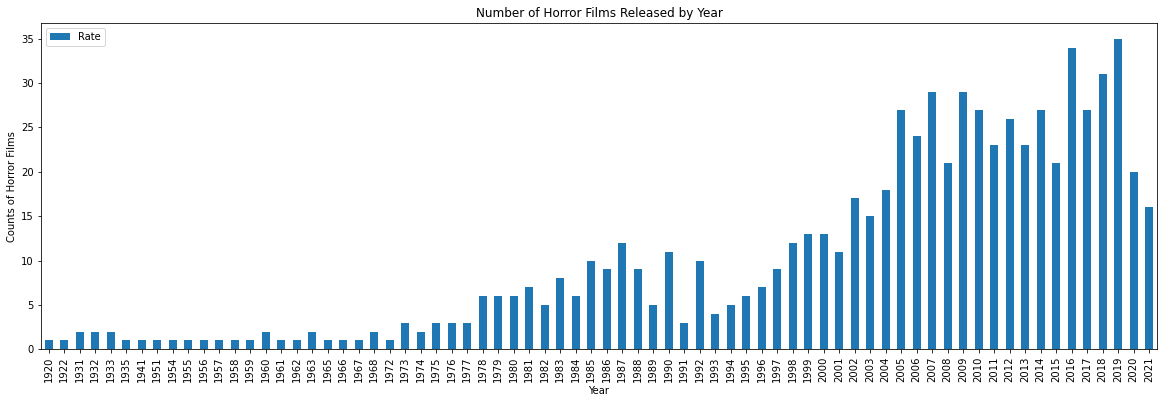

In [218]:
release_count = main_rank[["Year", "Rate"]].groupby(['Year']).count()
release_count_plot = release_count.plot(
    title = "Number of Horror Films Released by Year",
    kind = 'bar',
    figsize = (20,6) # adjust graph size
    )
release_count_plot.set_ylabel("Counts of Horror Films")

### 1.2. Film Rating Trend by Year
by using the scatter plot with release year on the horizontal axis and rating scores on the vertical axis, we will add the best fit line as the rating trend of all horror movies over time

In [219]:
import numpy as np
import matplotlib.pyplot as plt

In [220]:
# release_rate = main_rank[["Year", "Rate"]].groupby(['Year']).mean()
# # release_rate.head()
# release_rate_plot = release_rate.reset_index().plot(
#     x = 'Year',
#     y = 'Rate',
#     kind = 'scatter'
# )

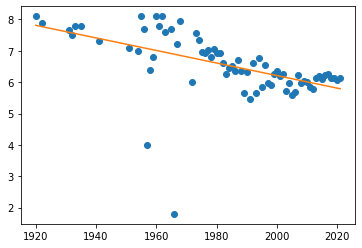

In [221]:
# Using Matplot and NumpyArray
release_rate = main_rank[["Year", "Rate"]].groupby(['Year']).mean()
x = np.array(release_rate.reset_index()['Year'])
y = np.array(release_rate.reset_index()['Rate'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

#### 1.2.? 热力图

## 2. Genre & Rating


### 2.1. Proportion of Film by Genre
First, we will count the total number of films of each genre, and create a pie chart to show their proportions (e.g. among all 723 films, 40% are drama, 30% are adventure, etc.).

### 2.2. Ratings by Genre
Then, we will produce a bar chart with tags of film genres on the horizontal axis, and average user ratings on the vertical axis. This bar chart would show which genre is top rated by IMDb users.

### 2.3. Genre & Ranking
We plan to analyze the relationship between film genres and average ranking. For example, do drama horror movies rank higher than crime horror movies? 

## 3. Reviewer Portrait
We would like to summarize the characteristics of horror movie viewers and make a reviewer portrait. Our reviewer portrait will include the reviewers’ ages and genders.

### 3.1. Age
To study horror movie reviewers of different age groups

#### 3.1.1. Reviewer Age Distribution
By using the bar chart, we can first demonstrate the age distribution of horror movie reviewers with age group on the horizontal axis and the corresponding counts on the vertical axis.

#### 3.1.2. Rating Tendency by Age
Then we will use sub-bar plots to cross-analyze whether different age groups have different film-rating tendencies.

##### 3.1.2.1. Sub-bar Plot


##### 3.1.2.2. Bar Chart
with different age groups on the horizontal axis and their mean ratings on the vertical axis


### 3.2. Gender

#### 3.2.1. Reviewer Gender Ratio
First, we want to use a pie chart to show the gender ratio of horror movie reviewers.

#### 3.2.2. Rating Tendency by Gender
Similarly, we will use bar plots to display the rating tendencies of each gender. Also, by summing up the number of ratings of each gender for different genres, we wish to compare which kind of horror movies each gender prefers.

##### 3.2.2.1. Sub-bar Plot


##### 3.2.2.2. Bar Chart
with different genders on the horizontal axis and their mean ratings on the vertical axis


### 3.3. Reviewer Portrait of Genre Preference
To study which genre do people from each age group and of each gender prefer

#### 3.3.1. Age & Genre

#### 3.3.2. Gender & Genre

## 4. Which Country Produces the Most Good Horror Movies?
To analyze which country produces the most high-rated horror films, we will produce bar plots for each country to count the number of films by rating value. In each plot, the x-axis and y-axis will be film rating values and counts of films, respectively. The figures then could help us to answer questions such as whether the US produced more horror movies rated over 4 or below 3, or whether Germany released more low-rated movies than Japan.

In [222]:
mainpage = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/mainpage.csv")
mainpage.head()

,Name,Year,Rate,Genre,Country
0,Deep Red,1975,7.6,"Horror,Mystery,Thriller",Italy
1,The Wailing,2016,7.5,"Horror,Mystery,Thriller",South Korea
2,Psycho,1960,8.5,"Horror,Mystery,Thriller",United States
3,A Quiet Place,2018,7.5,"Drama,Horror,Sci-Fi",United States
4,The Lighthouse,2019,7.5,"Drama,Fantasy,Horror,Mystery",Canada


In [223]:
gb_country = mainpage[['Name', 'Country']].groupby('Country').count().sort_values(by='Name')
gb_country.tail(10)

,Name
Country,
South Korea,9
Italy,9
Australia,11
Japan,13
Spain,14
Germany,16
France,19
Canada,53
United Kingdom,65


<AxesSubplot:xlabel='Country'>

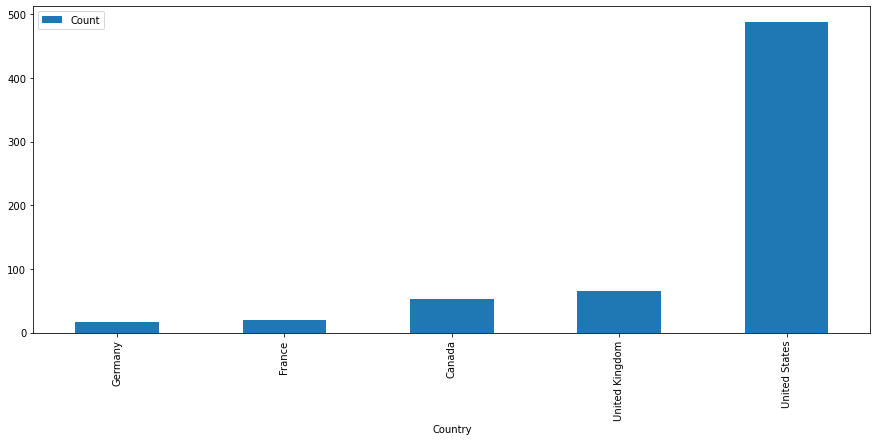

In [224]:
gb_country = mainpage[['Name', 'Country']].groupby('Country').count().sort_values(by='Name')
gb_country.reset_index().rename(columns={'Name' : 'Count'})[-5:].plot(
    x = 'Country',
    kind = 'bar',
    figsize = (15,6)
)

<AxesSubplot:ylabel='Count'>

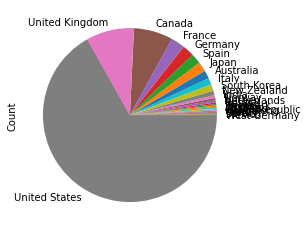

In [225]:
# pie chart: which country produces the highest fraction of horror films
# only shows tags for top 5 highest proportion
gb_country = mainpage[['Name', 'Country']].groupby('Country').count().sort_values(by='Name')
gb_country.reset_index().rename(columns={'Name' : 'Count'}).set_index('Country').plot.pie(
    y = 'Count',
    legend = False
    )

<AxesSubplot:ylabel='Count'>

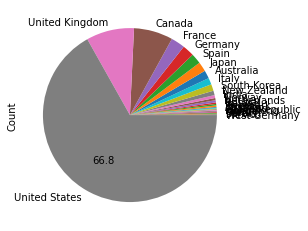

In [226]:
from matplotlib import pyplot as plt
gb_country.reset_index().rename(columns={'Name' : 'Count'}).set_index('Country').plot.pie(
    y = 'Count',
    legend = False,
    autopct=lambda p: format(p, '.1f') if p > 10 else None
    )

Here, we plot the top 5 countries that produces the most films: the United States, the United Kingdom, Canada, France, and Germany.

### 1. The United States

<AxesSubplot:ylabel='Density'>

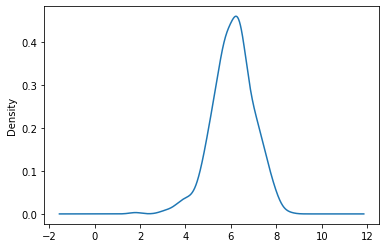

In [255]:
US = mainpage.query('Country == "United States"')#[['Rate', 'Country']].groupby('Rate').count().reset_index().rename(columns = {'Country' : 'Count'})
US['Rate'].plot.kde()

(array([0.        , 0.00204918, 0.        , 0.01639344, 0.07581967,
        0.33811475, 0.39344262, 0.16393443, 0.0102459 , 0.        ]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

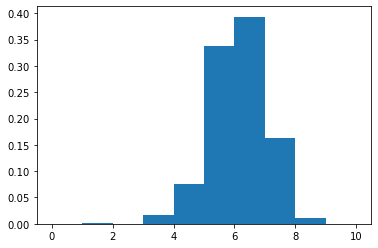

In [257]:
import matplotlib.pyplot as plt
plt.hist(
    mainpage.query('Country == "United States"')['Rate'],
    range = [0, 10],
    density = True
    )

### 2. The United Kingdom

### 3. Canada

### 4. France

### 5. Germany

## 5. Budge and Box Office


### 5.1. Are the Most Profitable Films Also Highest-Rated?
1. Calulate "Revenue"
2. find top 20 films with highest revenue
3. compare with 20 top rated films

We want to obtain the difference between gross worldwide box office and budget (“revenue”) of the 723 movies, find the 20 movies with the highest revenue, and compare them with the 20 highest rated movies to analyze the relationship between the revenue and ratings. 

In [267]:
budget_read = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/budget.csv")
budget_read.head()

,Name,Year,Rate,Genre,Country,Budget,Gross Worldwide
0,Psycho,1960,8.5,"Horror,Mystery,Thriller",United States,806947,32041845
1,The Wailing,2016,7.5,"Horror,Mystery,Thriller",South Korea,6420000,49851770
2,A Quiet Place,2018,7.5,"Drama,Horror,Sci-Fi",United States,17000000,340952971
3,The Lighthouse,2019,7.5,"Drama,Fantasy,Horror,Mystery",Canada,11000000,18124206
4,Saw,2004,7.6,"Horror,Mystery,Thriller",United States,1200000,103911669


In [268]:
ranking = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/ranking.csv")
ranking.head()

,Rank,Name,Year
0,1,Psycho,1960
1,2,The Shining,1980
2,3,Alien,1979
3,4,Tumbbad,2018
4,5,Demon Slayer: Mugen Train,2020


In [275]:
budget = pd.merge(budget_read, ranking, on=['Name', 'Year'])

#convert string to list
def stringToList(string):
    listRes = list(string.split(","))
    return listRes

budget["Genre_list"] =budget.apply(lambda x : stringToList(x["Genre"]),axis=1)
budget.head()

,Name,Year,Rate,Genre,Country,Budget,Gross Worldwide,Rank,Genre_list
0,Psycho,1960,8.5,"Horror,Mystery,Thriller",United States,806947,32041845,1,"[Horror, Mystery, Thriller]"
1,The Wailing,2016,7.5,"Horror,Mystery,Thriller",South Korea,6420000,49851770,48,"[Horror, Mystery, Thriller]"
2,A Quiet Place,2018,7.5,"Drama,Horror,Sci-Fi",United States,17000000,340952971,47,"[Drama, Horror, Sci-Fi]"
3,The Lighthouse,2019,7.5,"Drama,Fantasy,Horror,Mystery",Canada,11000000,18124206,46,"[Drama, Fantasy, Horror, Mystery]"
4,Saw,2004,7.6,"Horror,Mystery,Thriller",United States,1200000,103911669,40,"[Horror, Mystery, Thriller]"


In [276]:
budget.shape

(542, 9)

In [277]:
budget['revenue'] = budget['Gross Worldwide'] - budget['Budget']
budget.head()

,Name,Year,Rate,Genre,Country,Budget,Gross Worldwide,Rank,Genre_list,revenue
0,Psycho,1960,8.5,"Horror,Mystery,Thriller",United States,806947,32041845,1,"[Horror, Mystery, Thriller]",31234898
1,The Wailing,2016,7.5,"Horror,Mystery,Thriller",South Korea,6420000,49851770,48,"[Horror, Mystery, Thriller]",43431770
2,A Quiet Place,2018,7.5,"Drama,Horror,Sci-Fi",United States,17000000,340952971,47,"[Drama, Horror, Sci-Fi]",323952971
3,The Lighthouse,2019,7.5,"Drama,Fantasy,Horror,Mystery",Canada,11000000,18124206,46,"[Drama, Fantasy, Horror, Mystery]",7124206
4,Saw,2004,7.6,"Horror,Mystery,Thriller",United States,1200000,103911669,40,"[Horror, Mystery, Thriller]",102711669


In [278]:
budget.sort_values(by = 'revenue', ascending = False).head(20)

,Name,Year,Rate,Genre,Country,Budget,Gross Worldwide,Rank,Genre_list,revenue
500,It,2017,7.3,Horror,United States,35000000,701796444,83,[Horror],666796444
58,Hotel Transylvania 3: Summer Vacation,2018,6.3,"Animation,Adventure,Comedy,Family,Fantasy,Horror",United States,80000000,528583774,346,"[Animation, Adventure, Comedy, Family, Fantasy...",448583774
535,The Exorcist,1973,8.0,Horror,United States,11000000,441306145,11,[Horror],430306145
117,The Meg,2018,5.6,"Action,Horror,Sci-Fi,Thriller",United States,130000000,530438278,548,"[Action, Horror, Sci-Fi, Thriller]",400438278
445,Hotel Transylvania 2,2015,6.7,"Animation,Adventure,Comedy,Family,Fantasy,Horror",United States,80000000,475186706,210,"[Animation, Adventure, Comedy, Family, Fantasy...",395186706
411,It Chapter Two,2019,6.5,"Drama,Fantasy,Horror",United States,79000000,473093228,266,"[Drama, Fantasy, Horror]",394093228
26,World War Z,2013,7.0,"Action,Adventure,Horror,Sci-Fi",United States,190000000,540455876,149,"[Action, Adventure, Horror, Sci-Fi]",350455876
228,The Nun,2018,5.3,"Horror,Mystery,Thriller",United States,22000000,365551694,609,"[Horror, Mystery, Thriller]",343551694
2,A Quiet Place,2018,7.5,"Drama,Horror,Sci-Fi",United States,17000000,340952971,47,"[Drama, Horror, Sci-Fi]",323952971
520,The Conjuring,2013,7.5,"Horror,Mystery,Thriller",United States,20000000,320290989,50,"[Horror, Mystery, Thriller]",300290989


### 5.2. Which Genre Is The Most Profitable?
We will also cross-analyze the ranking based on revenue with the movies genre to see what type of horror movies people prefer to go to the movie theater.